In [25]:
# Importing required libraries
from sklearn import datasets
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data  # Features
target = iris.target  # Labels

# Check the type of the dataset and its shape
print(f"Type of data: {type(data)}")
print(f"Shape of data: {data.shape}")

# Print column names and first 5 rows
print(f"Column names: {iris.feature_names}")
print("First 5 rows of the dataset:")
print(data[:5])


Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
Column names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First 5 rows of the dataset:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [27]:
# Task 2.2: Function to get number of samples and features
def features_samples_of_dataset(dataset):
    samples, features = dataset.shape
    return samples, features

samples, features = features_samples_of_dataset(data)
print(f"Number of samples: {samples}")
print(f"Number of features: {features}")


Number of samples: 150
Number of features: 4


In [31]:
# Task 2.3: Split dataset into training and testing sets (80/20 split)
from sklearn.model_selection import train_test_split
train_data, test_data, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [33]:
# Task 2.4: Explore basic statistics
print(f"Mean: {np.mean(data, axis=0)}")
print(f"Standard Deviation: {np.std(data, axis=0)}")
print(f"Median: {np.median(data, axis=0)}")


Mean: [5.84333333 3.05733333 3.758      1.19933333]
Standard Deviation: [0.82530129 0.43441097 1.75940407 0.75969263]
Median: [5.8  3.   4.35 1.3 ]


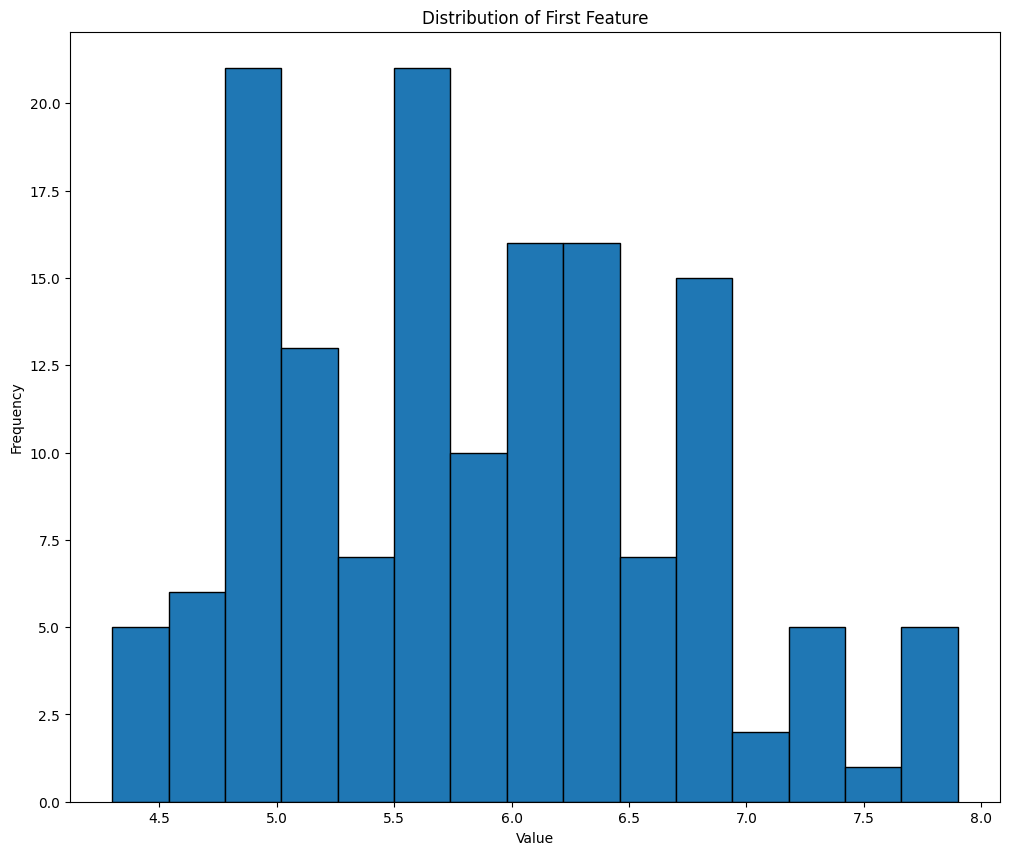

In [35]:
# Task 2.5: Visualize the distribution of a feature using a histogram
import matplotlib.pyplot as plt

first_feature = data[:, 0]
plt.figure(figsize=(12, 10))
plt.hist(first_feature, bins=15, edgecolor='black')
plt.title('Distribution of First Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [37]:
# Task 2.6: Calculate mean of a list
task_list = [i for i in range(1, 21, 2)]
arr = np.array(task_list)
print(f"Mean of task_list: {np.mean(arr)}")

# Task 2.7: Function to calculate count, mean, median, and standard deviation
def calculate_statistics(lst):
    arr = np.array(lst)
    return {
        'Count': len(lst),
        'Mean': np.mean(arr),
        'Median': np.median(arr),
        'Standard_Deviation': np.std(arr)
    }

statistics = calculate_statistics(task_list)
print("Statistics of task_list:", statistics)


Mean of task_list: 10.0
Statistics of task_list: {'Count': 10, 'Mean': np.float64(10.0), 'Median': np.float64(10.0), 'Standard_Deviation': np.float64(5.744562646538029)}


In [39]:
# Task 2.8: Generate a 5x5 matrix of random numbers
random_matrix = np.random.randint(1, 100, size=(5, 5))
print("5x5 Random Matrix:")
print(random_matrix)


5x5 Random Matrix:
[[62 73 71 91 55]
 [88 11 24 19 90]
 [91 38 32 55 55]
 [20 84 51 73 25]
 [93 37 70 15 45]]


In [41]:
# Task 2.9: Load a CSV file into a DataFrame and print summary statistics
import pandas as pd

file_path = 'HousingData.csv'
HD_df = pd.read_csv(file_path)
print("Summary statistics of HousingData.csv:")
print(HD_df.describe())


Summary statistics of HousingData.csv:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  35

In [42]:
# Task 2.10: Simple Linear Regression using Scikit-Learn
from sklearn.linear_model import LinearRegression

# Preprocessing steps for Housing Data
HD_df.replace('?', np.nan, inplace=True)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Replace NaN values with the average value
for column in columns:
    HD_df[column] = HD_df[column].astype(float).fillna(HD_df[column].astype(float).mean())

# Check for any remaining NaN values
print("Remaining NaN values after processing:")
print(HD_df[columns].isnull().sum())

# Define features and target for linear regression
X = HD_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = HD_df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Remaining NaN values after processing:
CRIM     0
ZN       0
INDUS    0
CHAS     0
AGE      0
LSTAT    0
dtype: int64
Model coefficients: [-1.14139919e-01  2.90156278e-02 -2.71329054e-02  3.24067342e+00
 -1.60175433e+01  4.75240956e+00 -1.95196142e-02 -1.52159267e+00
  2.22822577e-01 -9.15063665e-03 -8.86045288e-01  1.22626115e-02
 -4.38440425e-01]
Model intercept: 27.912465201030834
